# Figure S2 

# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, solve, simplify
import pandas as pd
import sympy as sp
plt.rcParams.update({'font.size': 20})

# Definitions

Function to define the properties of the axis of a plot

In [2]:
def my_axsis(ax, xlim, ylim, xticks, title, xtickslabels, bold=True, scale='lin'):    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(xticks)
    ax.set_title(title)
    ax.set_xticklabels(xtickslabels)
    
    if bold==True:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.2)
            
    if scale=='log':
        ax.set_yscale('log', base=2)

# Model 

Definition of the parameters of the model 


In [3]:
T, V1, V2, K1, K2, Kb = symbols('T V1 V2 K1 K2 Kb') 
Vs, Rb, Ks, Vrg, Qb, Krg = symbols('Vs Rb Ks Vrg Qb Krg')
R, F_A, Kd, Q, E, Ke = symbols('R F Kd Q E Ke')
S1_A, Qtot, S2, Rtot= symbols('S1 Qtot S2 Rtot')
F_B61, F_B62, F_B63, F_B64 = symbols('F_B61 F_B62 F_B63 F_B64')
S1_B61, S1_B62, S1_B63, S1_B64 = symbols('S1_B61 S1_B62 S1_B63 S1_B64')

Solve the evolution equation for T

In [4]:
# Evolution equation for T: 
expr = V1*(1-T)/(K1+(1-T))-V2*T/(K2+T)-Kb*T
expr_simplified= V1*(1-T)*(K2+T) -V2*T*(K1+(1-T))-Kb*T*(K1+(1-T))*(K2+T)
print('Evolution equation for T:')
print(expr)

# Solve the equation 
sol = solve(expr_simplified, T)[1]

# Compute the number of bound receptors 
Rb_A = Rtot*S1_A*F_A/(F_A+Kd)
Rb_B61 = Rtot*S1_B61*F_B61/(F_B61+Kd)
Rb_B62 = Rtot*S1_B62*F_B62/(F_B62+Kd)
Rb_B63 = Rtot*S1_B63*F_B63/(F_B63+Kd)
Rb_B64 = Rtot*S1_B64*F_B64/(F_B64+Kd)

Rb = Rb_A + Rb_B61 + Rb_B62 + Rb_B63 + Rb_B64
Qb = Qtot*S2*E/(E+Ke)

# Substitute the expression for V1 and V2 in the expression for T:  
sol_T= sol.subs([(V1, Vs*Rb/(Ks+Rb)),(V2, Vrg*Qb/(Krg+Qb))])

Evolution equation for T:
-Kb*T - T*V2/(K2 + T) + V1*(1 - T)/(K1 - T + 1)


Definition of the function ExprT that compute T as a function of all the parameters of the equation

In [5]:
def exprT(Vs_v=1, Vrg_v=0.4, K1_v=0.5, K2_v=0.2, Krg_v=1200, Ks_v=1200, Kb_v=0.2, F_Av=5, F_B61v = 5, F_B62v= 0.7, F_B63v = 0.01, F_B64v=0.7, Kd_v=25, E_v=5, Ke_v=50, Rtot_v=2000, Qtot_v=2000, S1_Av=0.5, S1_B61v=0.2, S1_B62v=0, S1_B63v=0, S1_B64v =0, S2_v=0.4):
    sol_T_temp = sol_T.subs([(Vs,Vs_v),(Vrg,Vrg_v),(K1, K1_v),(K2,K2_v),(Krg, Krg_v), (Ks, Ks_v), (Kb, Kb_v),(F_A, F_Av),(F_B61, F_B61v),(F_B62, F_B62v),(F_B63, F_B63v),(F_B64, F_B64v),(Kd, Kd_v),(E,E_v),(Ke, Ke_v),(Rtot, Rtot_v),(Qtot,Qtot_v),(S1_A,S1_Av),(S1_B61,S1_B61v),(S1_B62,S1_B62v),(S1_B63,S1_B63v),(S1_B64,S1_B64v),(S2,S2_v)])
    sol_T_temp = np.real(np.array(sol_T_temp,complex))
    return sol_T_temp

 Definition of the function to compute Erk (as a function of T): 

In [6]:
def Erk(T,n=2, Kerk=0.5, Erk_max=1, Erk_bas=0): 
    Erk = [Erk_max* T[i]**n/(T[i]**n +Kerk**n) + Erk_bas for i in range(len(T))]
    return Erk

# Import the experimental data 

In [7]:
#read the excel file with the experimental data
data_cellContact_bline = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Cell surface contacts b-line')
df_cellContact_bline = pd.DataFrame(data_cellContact_bline)

data_FigS2 = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Fig S2')
df_FigS2 = pd.DataFrame(data_FigS2)

Data cell surface contact 

In [8]:
# Cell surface contacts of cell b6.5
S_b65_B61 = np.array(df_cellContact_bline.iloc[:,1].values.tolist())[0:26] 
S_b65_B62 = np.array(df_cellContact_bline.iloc[:,2].values.tolist())[0:26] 
S_b65_B63 = np.array(df_cellContact_bline.iloc[:,3].values.tolist())[0:26] 
S_b65_B64 = np.array(df_cellContact_bline.iloc[:,4].values.tolist())[0:26] 
S_b65_Aline = np.array(df_cellContact_bline.iloc[:,5].values.tolist())[0:26] 
S_b65_an = np.array(df_cellContact_bline.iloc[:,6].values.tolist())[0:26] 

mean_Sb65_B61 = np.nanmean(S_b65_B61)
mean_Sb65_B62 = np.nanmean(S_b65_B62)
mean_Sb65_B63 = np.nanmean(S_b65_B63)
mean_Sb65_B64 = np.nanmean(S_b65_B64)
mean_Sb65_A = np.nanmean(S_b65_Aline)

# Cell surface contacts of cell b6.6
S_b66_B61 = np.array(df_cellContact_bline.iloc[:,1].values.tolist())[28:54] 
S_b66_B62 = np.array(df_cellContact_bline.iloc[:,2].values.tolist())[28:54] 
S_b66_B63 = np.array(df_cellContact_bline.iloc[:,3].values.tolist())[28:54] 
S_b66_B64 = np.array(df_cellContact_bline.iloc[:,4].values.tolist())[28:54] 
S_b66_Aline = np.array(df_cellContact_bline.iloc[:,5].values.tolist())[28:54] 
S_b66_an = np.array(df_cellContact_bline.iloc[:,6].values.tolist())[28:54]

mean_Sb66_B61 = np.nanmean(S_b66_B61)
mean_Sb66_B62 = np.nanmean(S_b66_B62)
mean_Sb66_B63 = np.nanmean(S_b66_B63)
mean_Sb66_B64 = np.nanmean(S_b66_B64)
mean_Sb66_A = np.nanmean(S_b66_Aline)

# Cell surface contacts of cell b6.7
S_b67_B61 = np.array(df_cellContact_bline.iloc[:,1].values.tolist())[56:82] 
S_b67_B62 = np.array(df_cellContact_bline.iloc[:,2].values.tolist())[56:82] 
S_b67_B63 = np.array(df_cellContact_bline.iloc[:,3].values.tolist())[56:82] 
S_b67_B64 = np.array(df_cellContact_bline.iloc[:,4].values.tolist())[56:82] 
S_b67_Aline = np.array(df_cellContact_bline.iloc[:,5].values.tolist())[56:82] 
S_b67_an = np.array(df_cellContact_bline.iloc[:,6].values.tolist())[56:82] 

mean_Sb67_B61 = np.nanmean(S_b67_B61)
mean_Sb67_B62 = np.nanmean(S_b67_B62)
mean_Sb67_B63 = np.nanmean(S_b67_B63)
mean_Sb67_B64 = np.nanmean(S_b67_B64)
mean_Sb67_A = np.nanmean(S_b67_Aline)

# Cell surface contacts of cell b6.8
S_b68_B61 = np.array(df_cellContact_bline.iloc[:,1].values.tolist())[84:110] 
S_b68_B62 = np.array(df_cellContact_bline.iloc[:,2].values.tolist())[84:110] 
S_b68_B63 = np.array(df_cellContact_bline.iloc[:,3].values.tolist())[84:110] 
S_b68_B64 = np.array(df_cellContact_bline.iloc[:,4].values.tolist())[84:110] 
S_b68_Aline = np.array(df_cellContact_bline.iloc[:,5].values.tolist())[84:110]
S_b68_an = np.array(df_cellContact_bline.iloc[:,6].values.tolist())[84:110] 

mean_Sb68_B61 = np.nanmean(S_b68_B61)
mean_Sb68_B62 = np.nanmean(S_b68_B62)
mean_Sb68_B63 = np.nanmean(S_b68_B63)
mean_Sb68_B64 = np.nanmean(S_b68_B64)
mean_Sb68_A = np.nanmean(S_b68_Aline)


Erk fluorescence levels 

In [9]:
Erk_b65_ctr = np.array(df_FigS2.iloc[:,1].values.tolist())[0:103] 
Erk_b66_ctr = np.array(df_FigS2.iloc[:,2].values.tolist())[0:103] 
Erk_b67_ctr = np.array(df_FigS2.iloc[:,3].values.tolist())[0:103] 
Erk_b68_ctr = np.array(df_FigS2.iloc[:,4].values.tolist())[0:103] 

# Compute the mean of the exp data 
Erk_mean_b65_ctr = np.nanmean(Erk_b65_ctr)
Erk_mean_b66_ctr = np.nanmean(Erk_b66_ctr)
Erk_mean_b67_ctr = np.nanmean(Erk_b67_ctr)
Erk_mean_b68_ctr = np.nanmean(Erk_b68_ctr)

# Compute the std of exp data
Erk_sdev_b65_ctr = np.nanstd(Erk_b65_ctr)
Erk_sdev_b66_ctr = np.nanstd(Erk_b66_ctr)
Erk_sdev_b67_ctr = np.nanstd(Erk_b67_ctr)
Erk_sdev_b68_ctr = np.nanstd(Erk_b68_ctr)

# Results

## Figure S2

### Model predictions

Compute Erk activity 

In [10]:
# Compute T
T_pred_b65 = [exprT(S1_Av= S_b65_Aline[i], S1_B61v=S_b65_B61[i], S1_B62v=S_b65_B62[i], S1_B63v=S_b65_B63[i], S1_B64v=S_b65_B64[i], S2_v=S_b65_an[i]) for i in range(len(S_b65_B64))]
T_pred_b66 = [exprT(S1_Av= S_b66_Aline[i], S1_B61v=S_b66_B61[i], S1_B62v=S_b66_B62[i], S1_B63v=S_b66_B63[i], S1_B64v=S_b66_B64[i], S2_v=S_b66_an[i]) for i in range(len(S_b66_B64))]
T_pred_b67 = [exprT(S1_Av= S_b67_Aline[i], S1_B61v=S_b67_B61[i], S1_B62v=S_b67_B62[i], S1_B63v=S_b67_B63[i], S1_B64v=S_b67_B64[i], S2_v=S_b67_an[i]) for i in range(len(S_b67_B64))]
T_pred_b68 = [exprT(S1_Av= S_b68_Aline[i], S1_B61v=S_b68_B61[i], S1_B62v=S_b68_B62[i], S1_B63v=S_b68_B63[i], S1_B64v=S_b68_B64[i], S2_v=S_b68_an[i]) for i in range(len(S_b68_B64))]

# Compute Erk
Erk_pred_b65_a = Erk(T_pred_b65)
Erk_pred_b66_a = Erk(T_pred_b66)
Erk_pred_b67_a = Erk(T_pred_b67)
Erk_pred_b68_a = Erk(T_pred_b68)

# Compute the mean Erk value for each cell type (with our model)
mean_b65_Erk_model_a= np.mean(Erk_pred_b65_a) 
mean_b66_Erk_model_a= np.mean(Erk_pred_b66_a)
mean_b67_Erk_model_a= np.mean(Erk_pred_b67_a)
mean_b68_Erk_model_a= np.mean(Erk_pred_b68_a)
Erk_mean_a = [mean_b65_Erk_model_a, mean_b66_Erk_model_a, mean_b67_Erk_model_a, mean_b68_Erk_model_a]

# Compute the std
sdev_b65_Erk_model_a = np.std(Erk_pred_b65_a)
sdev_b66_Erk_model_a = np.std(Erk_pred_b66_a)
sdev_b67_Erk_model_a = np.std(Erk_pred_b67_a)
sdev_b68_Erk_model_a = np.std(Erk_pred_b68_a)

Compute Erk fluorescence 

In [11]:
Erk_max= 1500    
Erk_bas = np.nanmean(Erk_b68_ctr)  

Erk_pred_b65_f = Erk(T_pred_b65, Erk_max=Erk_max, Erk_bas =Erk_bas)
Erk_pred_b66_f = Erk(T_pred_b66, Erk_max=Erk_max, Erk_bas =Erk_bas)
Erk_pred_b67_f = Erk(T_pred_b67, Erk_max=Erk_max, Erk_bas =Erk_bas)
Erk_pred_b68_f = Erk(T_pred_b68, Erk_max=Erk_max, Erk_bas =Erk_bas)

# Compute the mean Erk value for each cell type (with our model)
mean_b65_Erk_model_f= np.nanmean(Erk_pred_b65_f) 
mean_b66_Erk_model_f= np.nanmean(Erk_pred_b66_f)
mean_b67_Erk_model_f= np.nanmean(Erk_pred_b67_f)
mean_b68_Erk_model_f= np.nanmean(Erk_pred_b68_f)
Erk_mean_f = [mean_b65_Erk_model_f, mean_b66_Erk_model_f, mean_b67_Erk_model_f, mean_b68_Erk_model_f]

# Compute the std
sdev_b65_Erk_model_f = np.sqrt(Erk_max**2*sdev_b65_Erk_model_a**2+Erk_sdev_b68_ctr**2)
sdev_b66_Erk_model_f = np.sqrt(Erk_max**2*sdev_b66_Erk_model_a**2+Erk_sdev_b68_ctr**2)
sdev_b67_Erk_model_f = np.sqrt(Erk_max**2*sdev_b67_Erk_model_a**2+Erk_sdev_b68_ctr**2)
sdev_b68_Erk_model_f = np.sqrt(Erk_max**2*sdev_b68_Erk_model_a**2+Erk_sdev_b68_ctr**2)

### Comparison with experimental data

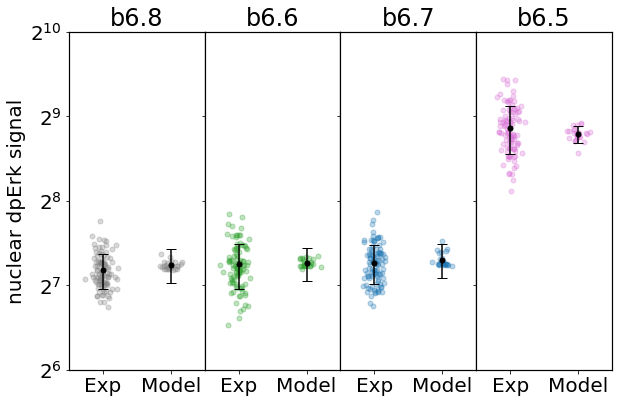

In [12]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(1,4, hspace=0,wspace=0)
axs = gs.subplots(sharey=True)

# a6.8 
x = np.random.normal(1, 0.08, size=len(Erk_b68_ctr))
axs[0].plot(x,Erk_b68_ctr,'.', color='grey', alpha=0.3,markersize=10,zorder=1)

x = 1 
axs[0].errorbar(x,Erk_mean_b68_ctr ,Erk_sdev_b68_ctr, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Erk_pred_b68_f))
axs[0].plot(x,Erk_pred_b68_f,'.', color='grey', alpha=0.3,markersize=10,zorder=1)

x = 2 
axs[0].errorbar(x,mean_b68_Erk_model_f ,sdev_b68_Erk_model_f, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[0], xlim=[0.5,2.5], ylim=[2**6,2**(10)], xticks=[1,2], title='b6.8', xtickslabels=['Exp', 'Model'], bold=True, scale='log')
axs[0].set_ylabel('nuclear dpErk signal')
   
# a6.6 
x = np.random.normal(1, 0.08, size=len(Erk_b66_ctr))
axs[1].plot(x,Erk_b66_ctr,'.', color='tab:green', alpha=0.3, markersize=10,zorder=1)

x = 1 
axs[1].errorbar(x,Erk_mean_b66_ctr ,Erk_sdev_b66_ctr, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Erk_pred_b66_f))
axs[1].plot(x,Erk_pred_b66_f,'.', color='tab:green', alpha=0.3, markersize=10,zorder=1)

x = 2 
axs[1].errorbar(x,mean_b66_Erk_model_f ,sdev_b66_Erk_model_f, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[1], xlim=[0.5,2.5], ylim=[2**6,2**(10)], xticks=[1,2], title='b6.6', xtickslabels=['Exp', 'Model'], bold=True, scale='log')

# a6.7 
x = np.random.normal(1, 0.08, size=len(Erk_b67_ctr))
axs[2].plot(x,Erk_b67_ctr,'.', color='tab:blue', alpha=0.3,markersize=10,zorder=1)

x = 1 
axs[2].errorbar(x,Erk_mean_b67_ctr ,Erk_sdev_b67_ctr, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Erk_pred_b67_f))
axs[2].plot(x,Erk_pred_b67_f,'.', color='tab:blue', alpha=0.3,markersize=10,zorder=1)

x = 2 
axs[2].errorbar(x,mean_b67_Erk_model_f ,sdev_b67_Erk_model_f, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[2], xlim=[0.5,2.5], ylim=[2**6,2**(10)], xticks=[1,2], title='b6.7', xtickslabels=['Exp', 'Model'], bold=True, scale='log')

# a6.5
x = np.random.normal(1, 0.08, size=len(Erk_b65_ctr))
axs[3].plot(x,Erk_b65_ctr,'.', color='orchid', alpha=0.3,markersize=10,zorder=1)

x = 1 
axs[3].errorbar(x,Erk_mean_b65_ctr ,Erk_sdev_b65_ctr, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Erk_pred_b65_f))
axs[3].plot(x,Erk_pred_b65_f,'.', color='orchid', alpha=0.3,markersize=10,zorder=1)

x = 2 
axs[3].errorbar(x,mean_b65_Erk_model_f ,sdev_b65_Erk_model_f, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[3], xlim=[0.5,2.5], ylim=[2**6,2**(10)], xticks=[1,2], title='b6.5', xtickslabels=['Exp', 'Model'], bold=True, scale='log')

plt.tight_layout()
plt.show()
